In [3]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
%%time
imdb_data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)
CPU times: user 623 ms, sys: 129 ms, total: 752 ms
Wall time: 1.33 s


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
#sentiment count
imdb_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
#split the dataset
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [8]:
import nltk
nltk.download('stopwords')
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

/tmp/ipykernel_33/841911545.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [10]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [11]:
import nltk
from nltk.stem import PorterStemmer

# Initializing the Porter Stemmer
ps = PorterStemmer()

# Define the stemming function
def simple_stemmer(text):
    # Split text into words, stem each word, and join them back into a string
    stemmed_text = ' '.join([ps.stem(word) for word in text.split()])
    return stemmed_text

# Apply the stemming function to the 'review' column
imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)


In [12]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'having', 'been', 'not', "hadn't", 'was', 'at', 'll', 'o', 'aren', 'then', 'now', 'out', 'too', 'itself', 'after', 'doesn', 'further', "mustn't", "weren't", 'haven', 'but', 'wouldn', 'as', 'its', 'hadn', 'that', "hasn't", 'd', 'his', "didn't", 'own', "she's", 'each', 'by', 'against', "doesn't", 'them', 'and', "that'll", 'below', 'until', 'won', 'couldn', 're', 'we', "should've", "you'd", 'herself', 'did', 'has', 'their', 'myself', 'ours', 'ourselves', 'will', 'had', 'mustn', 'you', 'here', "isn't", "haven't", 'once', 'under', 'my', 'on', "shan't", 'some', "wasn't", 'few', 'so', 'or', 'down', "won't", 'are', 'i', 'have', 'where', 'this', 'because', 'it', 'isn', 'can', 'our', 'into', 'no', "don't", 'why', 'she', 'to', 'shan', 'wasn', 'before', "you'll", 'than', 'doing', 'which', 'same', 'yours', 't', 'theirs', 'nor', 'her', 'shouldn', 'hers', "couldn't", 'such', 'y', "wouldn't", 'again', 'didn', 'himself', 'ain', 'those', 'were', 'the', "mightn't", 'any', 'yourselves', 'just', 'through'

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(imdb_data['review']).toarray()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [15]:
y=pd.get_dummies(imdb_data['sentiment'])
y=y.iloc[:,1].values

In [17]:
models = dict()
models['Logistic Regression'] = LogisticRegression(max_iter=1000)
models['XGB']= XGBClassifier(n_estimators=5000)
models['Support Vector Machine'] = SVC(kernel = 'sigmoid', gamma='scale')
models['Decision Tree'] = DecisionTreeClassifier(max_depth=100)
models['Random Forest'] = RandomForestClassifier()
models['kNN'] = KNeighborsClassifier()
models['SGD']=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)
models['MNB']=MultinomialNB()
for model in models:
    models[model].fit(X_train, y_train)
    print(model + " model fitting completed.")

Logistic Regression model fitting completed.
XGB model fitting completed.
Support Vector Machine model fitting completed.
Decision Tree model fitting completed.
Random Forest model fitting completed.
kNN model fitting completed.
SGD model fitting completed.
MNB model fitting completed.


Test Set Prediction:

--------------------Logistic Regression--------------------
              precision    recall  f1-score   support

       False    0.89138   0.86676   0.87890      4961
        True    0.87230   0.89601   0.88399      5039

    accuracy                        0.88150     10000
   macro avg    0.88184   0.88139   0.88145     10000
weighted avg    0.88176   0.88150   0.88147     10000



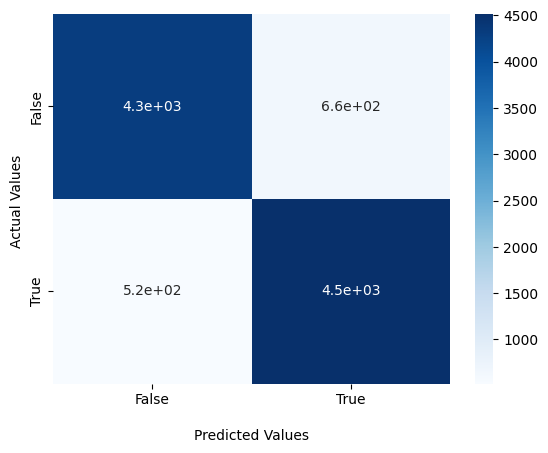

--------------------XGB--------------------
              precision    recall  f1-score   support

       False    0.88155   0.85809   0.86966      4961
        True    0.86386   0.88649   0.87502      5039

    accuracy                        0.87240     10000
   macro avg    0.87270   0.87229   0.87234     10000
weighted avg    0.87263   0.87240   0.87236     10000



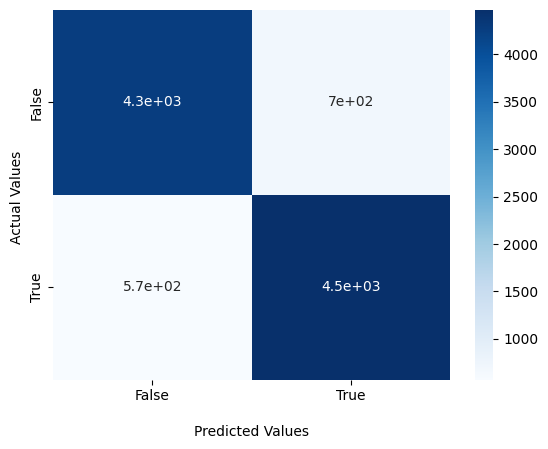

--------------------Support Vector Machine--------------------
              precision    recall  f1-score   support

       False    0.88823   0.86978   0.87891      4961
        True    0.87437   0.89224   0.88321      5039

    accuracy                        0.88110     10000
   macro avg    0.88130   0.88101   0.88106     10000
weighted avg    0.88124   0.88110   0.88108     10000



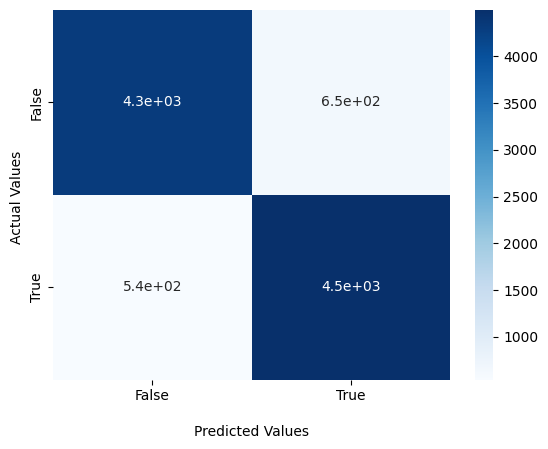

--------------------Decision Tree--------------------
              precision    recall  f1-score   support

       False    0.71721   0.71215   0.71468      4961
        True    0.71857   0.72356   0.72105      5039

    accuracy                        0.71790     10000
   macro avg    0.71789   0.71786   0.71786     10000
weighted avg    0.71790   0.71790   0.71789     10000



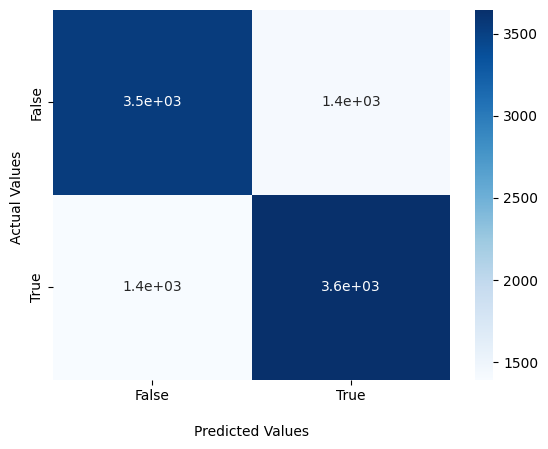

--------------------Random Forest--------------------
              precision    recall  f1-score   support

       False    0.83643   0.85346   0.84486      4961
        True    0.85277   0.83568   0.84414      5039

    accuracy                        0.84450     10000
   macro avg    0.84460   0.84457   0.84450     10000
weighted avg    0.84467   0.84450   0.84450     10000



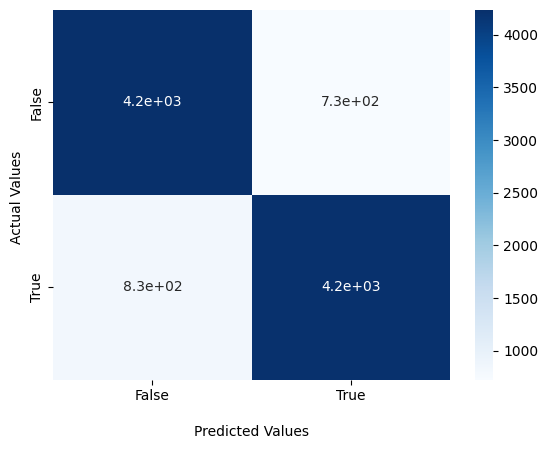

--------------------kNN--------------------
              precision    recall  f1-score   support

       False    0.78111   0.69845   0.73747      4961
        True    0.73113   0.80730   0.76733      5039

    accuracy                        0.75330     10000
   macro avg    0.75612   0.75288   0.75240     10000
weighted avg    0.75592   0.75330   0.75252     10000



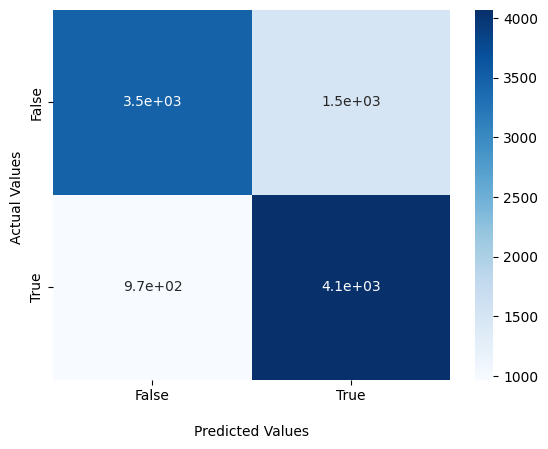

--------------------SGD--------------------
              precision    recall  f1-score   support

       False    0.88872   0.82262   0.85439      4961
        True    0.83728   0.89859   0.86685      5039

    accuracy                        0.86090     10000
   macro avg    0.86300   0.86060   0.86062     10000
weighted avg    0.86280   0.86090   0.86067     10000



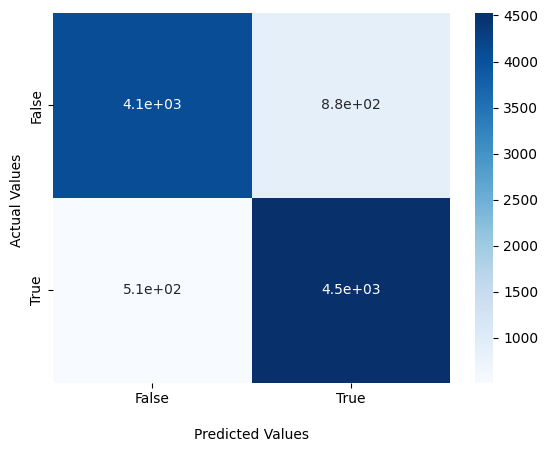

--------------------MNB--------------------
              precision    recall  f1-score   support

       False    0.84919   0.83652   0.84281      4961
        True    0.84138   0.85374   0.84752      5039

    accuracy                        0.84520     10000
   macro avg    0.84529   0.84513   0.84516     10000
weighted avg    0.84526   0.84520   0.84518     10000



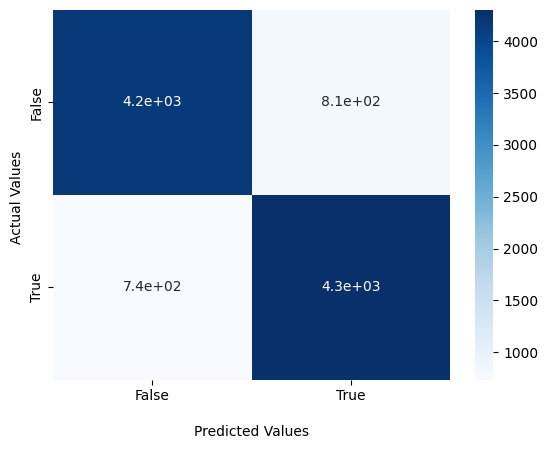

In [19]:
print("Test Set Prediction:\n")
for x in models:
    print('-'*20+x+'-'*20)
    y_pred = models[x].predict(X_test)
    print(classification_report(y_test, y_pred,digits=5))
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

In [ ]:
print("Test Set Prediction:\n")
for x in models:
    print('-'*20+x+'-'*20)
    y_pred = models[x].predict(X_test)
    print(classification_report(y_test, y_pred,digits=5))
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()